In [100]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np


In [74]:
df = pd.read_csv("Data/marketing_campaign.csv", sep="\t")
drop_columns = ["ID", 'Z_CostContact', 'Z_Revenue']
df = df.drop(drop_columns, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [75]:
from datetime import datetime

for row in range(len(df["Dt_Customer"])):
  df["Dt_Customer"][row] = datetime.strptime(df["Dt_Customer"][row], '%d-%m-%Y').year 
  
df.head()

/tmp/ipykernel_31045/3656975255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dt_Customer"][row] = datetime.strptime(df["Dt_Customer"][row], '%d-%m-%Y').year


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [76]:
nominal_at = ['Education', 'Marital_Status', 'Dt_Customer']
le = LabelEncoder()

for atribute in nominal_at:
  df[atribute] = le.fit_transform(df[atribute])

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,4,58138.0,0,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,2,4,46344.0,1,1,2,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,2,5,71613.0,0,0,1,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,2,5,26646.0,1,0,2,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,4,3,58293.0,1,0,2,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [107]:
df = df.drop(df[np.isnan(df['Income'])].index)

In [120]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=10).fit(df)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

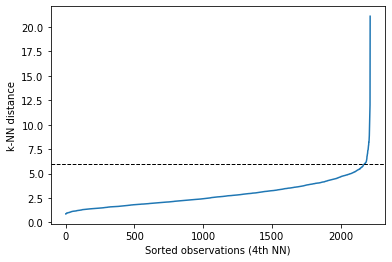

In [121]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=6, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [130]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=6, min_samples=4).fit(df)
# get cluster labels
clusters.labels_


# check unique clusters
set(clusters.labels_)

{-1, 0, 1, 2, 3, 4}

In [131]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 2153, -1: 18, 1: 19, 2: 19, 3: 4, 4: 3})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data=df, x="t-SNE-1", y="t-SNE-2", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()